In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='whitegrid',palette='deep', font='Adobe Fan Heiti Std', font_scale=1, rc={'figure.dpi':120})
%matplotlib inline
data = pd.read_csv('台中市房價.csv')

data


,經度,緯度,屋齡,面積,建物類型,用途,樓高/樓別,佈局,電梯,管理員,車位數量,價格,行政區,交易年份
0,120.689375,24.129121,28.0,36.87,華廈(10層含以下有電梯),住家用,五層/七層,3房2廳2衛,有,無,1,"8,980,000",東區,111
1,120.695265,24.147002,26.0,9.62,套房(1房(1廳)1衛),住家用,六層/七層,1房1廳1衛,有,有,0,"1,910,000",東區,111
2,120.690512,24.126875,37.0,58.99,華廈(10層含以下有電梯),住家用,三層/七層,5房3廳3衛,有,有,0,"12,050,000",東區,111
3,120.689970,24.127208,2.0,48.48,住宅大樓(11層含以上有電梯),住家用,四層/十三層,3房2廳2衛,有,有,1,"13,000,000",東區,111
4,120.707178,24.148389,NaN,48.16,住宅大樓(11層含以上有電梯),住家用,十一層/二十四層,3房2廳2衛,有,有,1,"15,470,000",東區,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234899,120.638445,24.145171,14.0,28.08,住宅大樓(11層含以上有電梯),住家用,十一層/十四層,2房2廳1衛,無,有,1,"5,417,000",南屯區,101
234900,120.646751,24.130428,17.0,282.96,住宅大樓(11層含以上有電梯),住商用,"一層,二層,三層,騎樓/十二層",NaN,無,有,15,"61,000,000",南屯區,101
234901,120.641205,24.143435,5.0,87.29,透天厝,住家用,全/四層,4房1廳2衛,無,有,2,"30,000,000",南屯區,101
234902,120.653311,24.142045,4.0,67.94,住宅大樓(11層含以上有電梯),住家用,五層/十五層,3房2廳2衛,無,有,1,"17,200,000",南屯區,101


In [23]:
data = data[['經度', '緯度', '屋齡', '面積', '建物類型', '用途', '樓別/樓高', '佈局', '電梯', '管理員',
'車位數量', '行政區', '交易年份','價格']]

KeyError: "['樓別/樓高'] not in index"

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234904 entries, 0 to 234903
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   經度      234904 non-null  float64
 1   緯度      234904 non-null  float64
 2   屋齡      179589 non-null  float64
 3   面積      234904 non-null  object 
 4   建物類型    234902 non-null  object 
 5   用途      234890 non-null  object 
 6   樓高/樓別   234904 non-null  object 
 7   佈局      223508 non-null  object 
 8   電梯      234904 non-null  object 
 9   管理員     234904 non-null  object 
 10  車位數量    234904 non-null  int64  
 11  價格      234904 non-null  object 
 12  行政區     234904 non-null  object 
 13  交易年份    234904 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 25.1+ MB


In [25]:
#補值前 資料裡有一些數字比較大 有用到逗號 要先把逗號去掉
data['價格'] = data['價格'].replace(',', '', regex=True).astype(float)
data['面積'] = data['面積'].replace(',', '', regex=True).astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234904 entries, 0 to 234903
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   經度      234904 non-null  float64
 1   緯度      234904 non-null  float64
 2   屋齡      179589 non-null  float64
 3   面積      234904 non-null  float64
 4   建物類型    234902 non-null  object 
 5   用途      234890 non-null  object 
 6   樓高/樓別   234904 non-null  object 
 7   佈局      223508 non-null  object 
 8   電梯      234904 non-null  object 
 9   管理員     234904 non-null  object 
 10  車位數量    234904 non-null  int64  
 11  價格      234904 non-null  float64
 12  行政區     234904 non-null  object 
 13  交易年份    234904 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 25.1+ MB


In [27]:
data = data.drop_duplicates()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233196 entries, 0 to 234903
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   經度      233196 non-null  float64
 1   緯度      233196 non-null  float64
 2   屋齡      178969 non-null  float64
 3   面積      233196 non-null  float64
 4   建物類型    233194 non-null  object 
 5   用途      233182 non-null  object 
 6   樓高/樓別   233196 non-null  object 
 7   佈局      221954 non-null  object 
 8   電梯      233196 non-null  object 
 9   管理員     233196 non-null  object 
 10  車位數量    233196 non-null  int64  
 11  價格      233196 non-null  float64
 12  行政區     233196 non-null  object 
 13  交易年份    233196 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 26.7+ MB


In [29]:
data['建物類型'].value_counts()

建物類型
住宅大樓(11層含以上有電梯)    138587
透天厝                 29501
華廈(10層含以下有電梯)       27928
公寓(5樓含以下無電梯)        14633
套房(1房(1廳)1衛)        14129
店面（店舖)               4098
辦公商業大樓               3500
其他                    529
工廠                    165
廠辦                     82
農舍                     26
倉庫                     16
Name: count, dtype: int64

In [30]:
data['用途'].value_counts()

用途
住家用        205711
住商用         10757
商業用          9428
辦公用          3967
其他           1917
商辦用           546
工業用           294
住商辦用          251
住工用           208
農業用            70
工商用            32
見其他登記事項         1
Name: count, dtype: int64

In [31]:
data['建物類型'].fillna('住宅大樓(11層含以上有電梯)',inplace=True)
data['用途'].fillna('住家用',inplace=True)
data.dropna(subset=['佈局'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8100\482503012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['建物類型'].fillna('住宅大樓(11層含以上有電梯)',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8100\482503012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['用途'].fillna('住家用',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8100\482503012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [32]:
data.describe()

,經度,緯度,屋齡,面積,車位數量,價格,交易年份
count,221954.000000,221954.000000,169968.000000,221954.000000,221954.000000,2.219540e+05,221954.000000
mean,120.665760,24.158185,18.854049,48.080945,0.736427,1.127939e+07,106.111793
std,0.573588,0.116591,12.364412,50.821374,0.845468,1.692398e+07,3.039647
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,101.000000
25%,120.646841,24.143956,7.000000,29.680000,0.000000,5.200000e+06,103.000000
50%,120.667481,24.161386,20.000000,42.020000,1.000000,8.300000e+06,106.000000
75%,120.689990,24.174569,27.000000,57.430000,1.000000,1.315950e+07,109.000000
max,120.788263,24.214521,109.000000,9288.320000,103.000000,2.727360e+09,111.000000


In [35]:
s = data['價格'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] - IQR*1.5
data = data[data['價格'] < upper_lim]

In [36]:
s = data['面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*1.5
lower_lim = s['25%'] - IQR*1.5
data = data[data['面積'] < upper_lim]

In [37]:
data.describe()

,經度,緯度,屋齡,面積,車位數量,價格,交易年份
count,192417.000000,192417.000000,147801.000000,192417.000000,192417.000000,1.924170e+05,192417.000000
mean,120.667392,24.158313,19.821571,39.204383,0.646902,8.026248e+06,106.093666
std,0.551083,0.112225,12.035330,16.975490,0.608413,4.487861e+06,3.024713
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,101.000000
25%,120.648833,24.143957,9.000000,27.570000,0.000000,4.700000e+06,103.000000
50%,120.669646,24.161599,21.000000,38.760000,1.000000,7.500000e+06,106.000000
75%,120.691814,24.174796,27.000000,49.820000,1.000000,1.080000e+07,109.000000
max,120.788263,24.214521,109.000000,84.710000,9.000000,2.062250e+07,111.000000


Text(0, 0.5, '數量')

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33836 (\N{CJK UNIFIED IDEOGRAPH-842C}) missing from current font.
  func(*args, **kwargs)
findfont: Font family '

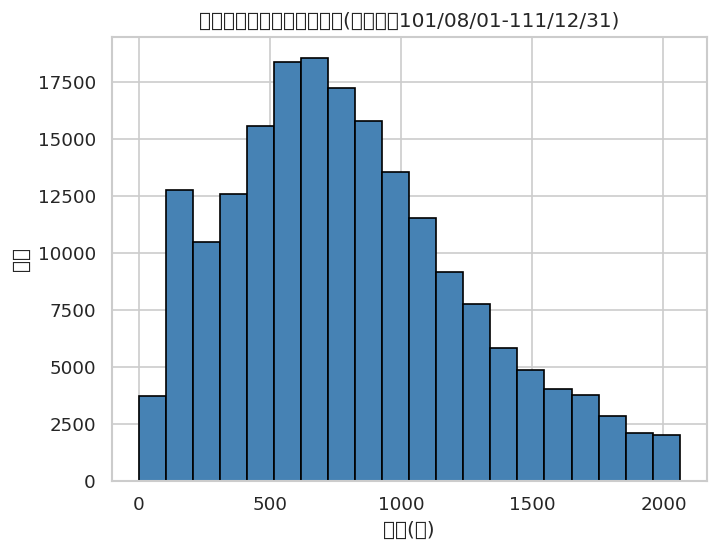

In [38]:
plt.hist(data['價格']/10000, bins=20, color='steelblue', edgecolor='black')
plt.title('台中市八大行政區房價分佈(交易時間101/08/01-111/12/31)')
plt.xlabel('價格(萬)')
plt.ylabel('數量')

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

Text(58.68399999999999, 0.5, '價格(萬)')

findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heit

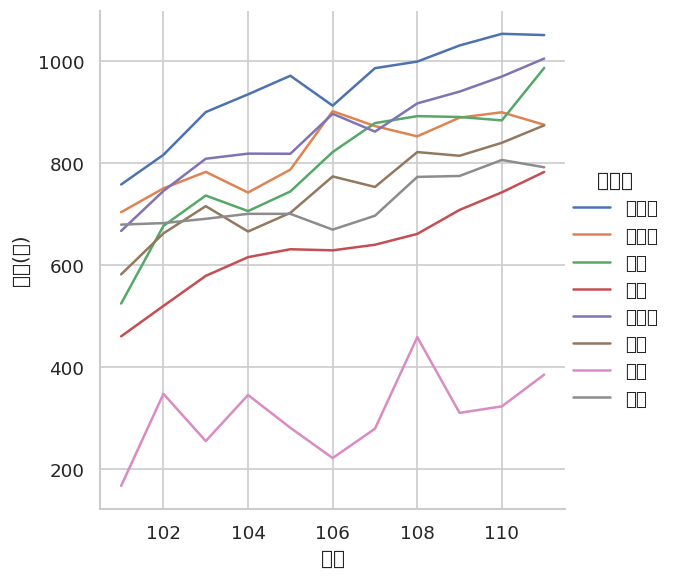

In [39]:
df = data.sort_values(by='交易年份',ascending=True)
df['價格']=df['價格']/10000
sns.relplot(x='交易年份', y='價格', hue='行政區', data=df,kind='line',ci=None)
plt.xlabel('年度')
plt.ylabel('價格(萬)')

In [40]:
data.loc[data['建物類型'].isin(['工廠','廠辦','農舍','倉庫']), '建物類型'] = '其他'
data['建物類型'] = data['建物類型'].str.split("\(",expand=True)[0]
data.loc[data['建物類型'].isin(['店面（店舖)']), '建物類型'] = '店面'

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  fig.canv

<Axes: xlabel='建物類型', ylabel='行政區'>

findfont: Font family 'Adobe Fan Heiti Std' not found.
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'Adobe Fan Heiti Std' not found.
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAP

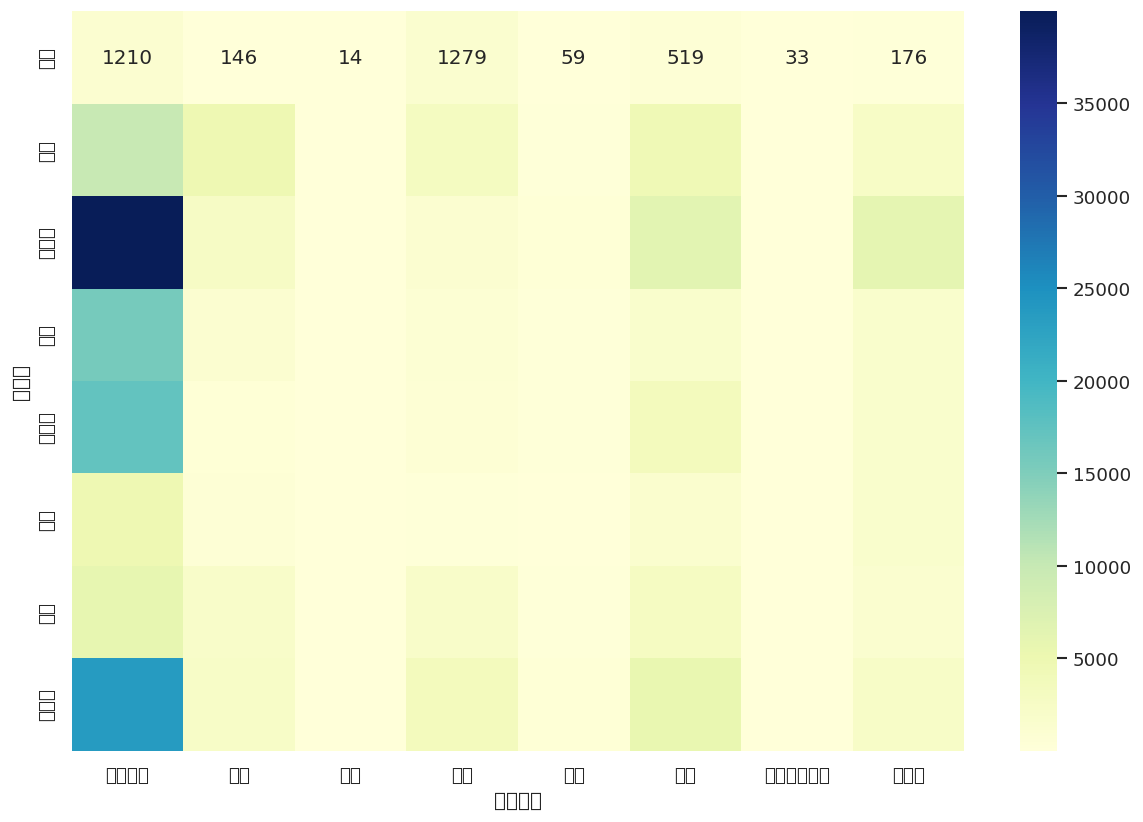

In [41]:
cross_table = pd.crosstab(data['行政區'],data['建物類型'])
plt.figure(figsize=(12,8))
sns.heatmap(cross_table,cmap='YlGnBu',annot=True,fmt='d')

In [42]:
data

,經度,緯度,屋齡,面積,建物類型,用途,樓高/樓別,佈局,電梯,管理員,車位數量,價格,行政區,交易年份
0,120.689375,24.129121,28.0,36.87,華廈,住家用,五層/七層,3房2廳2衛,有,無,1,8980000.0,東區,111
1,120.695265,24.147002,26.0,9.62,套房,住家用,六層/七層,1房1廳1衛,有,有,0,1910000.0,東區,111
2,120.690512,24.126875,37.0,58.99,華廈,住家用,三層/七層,5房3廳3衛,有,有,0,12050000.0,東區,111
3,120.689970,24.127208,2.0,48.48,住宅大樓,住家用,四層/十三層,3房2廳2衛,有,有,1,13000000.0,東區,111
4,120.707178,24.148389,NaN,48.16,住宅大樓,住家用,十一層/二十四層,3房2廳2衛,有,有,1,15470000.0,東區,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234897,120.653449,24.138235,18.0,39.07,住宅大樓,住家用,四層/十六層,3房2廳2衛,無,有,1,5700000.0,南屯區,101
234898,120.648482,24.148644,18.0,41.74,華廈,住家用,八層/九層,2房2廳1衛,無,有,1,5460000.0,南屯區,101
234899,120.638445,24.145171,14.0,28.08,住宅大樓,住家用,十一層/十四層,2房2廳1衛,無,有,1,5417000.0,南屯區,101
234902,120.653311,24.142045,4.0,67.94,住宅大樓,住家用,五層/十五層,3房2廳2衛,無,有,1,17200000.0,南屯區,101


In [49]:
data.loc[data['用途'].isin(['住家用\)']), '用途'] = '住家用'
data.loc[~data['用途'].isin(['住家用','住商用','商業用','辦公用','其他']), '用途'] = '其他'

In [50]:
data['樓別'] = data['樓別/樓高'].str.split('/',expand=True)[0] #樓別/樓高
data['樓高'] = data['樓別/樓高'].str.split('/',expand=True)[1] #樓別/樓高
data.drop(['樓別/樓高'],axis=1,inplace=True)

KeyError: '樓別/樓高'

In [48]:
data.樓別.value_counts().tail(100)

AttributeError: 'DataFrame' object has no attribute '樓別'

In [ ]:
print('處理前一共有',len(data.樓別.unique()),'不同的資料')
data['樓別'] = data['樓別'].str.split(',', expand=True)[0]
print('處理後一共有',len(data.樓別.unique()),'不同的資料')

處理前一共有 267 不同的資料
處理後一共有 43 不同的資料


In [ ]:
data.loc[data['樓別'].isin(['見其他登記事項','屋頂突出物','夾層','地下','','騎樓']), '樓別'] = '其他'
data['樓別'] = data['樓別'].apply(
lambda x: '地下' if '地下' in x
else '其他' if x in '其他'
else '全層' if x in '全'
else '低層' if x in ['一層', '二層', '三層', '四層', '五層']
else '中層' if x in ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
else '高層')

In [ ]:
data['樓別'].value_counts()

中層    94134
低層    74136
全層    19667
高層    10965
其他      511
地下      157
Name: 樓別, dtype: int64

In [ ]:
data.loc[data['樓高'].isin(['(空白)']), '樓高'] = '十五層' # 填補眾數
data['樓高'] = data['樓高'].apply(
lambda x:  '低層' if x in ['一層', '二層', '三層', '四層', '五層']
else '中層' if x in ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
else '高層')

In [ ]:
data

,經度,緯度,屋齡,面積,建物類型,用途,佈局,電梯,管理員,車位數量,行政區,交易年份,價格,樓別,樓高
0,120.689375,24.129121,28.0,36.87,華廈,住家用,3房2廳2衛,有,無,1,東區,111,8980000.0,低層,中層
1,120.695265,24.147002,26.0,9.62,套房,住家用,1房1廳1衛,有,有,0,東區,111,1910000.0,中層,中層
2,120.690512,24.126875,37.0,58.99,華廈,住家用,5房3廳3衛,有,有,0,東區,111,12050000.0,低層,中層
3,120.689970,24.127208,2.0,48.48,住宅大樓,住家用,3房2廳2衛,有,有,1,東區,111,13000000.0,低層,中層
4,120.707178,24.148389,NaN,48.16,住宅大樓,住家用,3房2廳2衛,有,有,1,東區,111,15470000.0,中層,高層
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234897,120.653449,24.138235,18.0,39.07,住宅大樓,住家用,3房2廳2衛,無,有,1,南屯區,101,5700000.0,低層,高層
234898,120.648482,24.148644,18.0,41.74,華廈,住家用,2房2廳1衛,無,有,1,南屯區,101,5460000.0,中層,中層
234899,120.638445,24.145171,14.0,28.08,住宅大樓,住家用,2房2廳1衛,無,有,1,南屯區,101,5417000.0,中層,中層
234902,120.653311,24.142045,4.0,67.94,住宅大樓,住家用,3房2廳2衛,無,有,1,南屯區,101,17200000.0,低層,中層


In [ ]:
data['房'] = data['佈局'].str.split('房',expand=True)[0]
data['廳'] = data['佈局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[0]
data['衛'] = data['佈局'].str.split('房',expand=True)[1].str.split('廳',expand=True)[1].str.split('衛',expand=True)[0]
data.drop('佈局',axis=1,inplace=True)

In [ ]:
data['房'] = data['房'].astype(float)
data['廳'] = data['廳'].astype(float)
data['衛'] = data['衛'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199570 entries, 0 to 234903
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   經度      199570 non-null  float64
 1   緯度      199570 non-null  float64
 2   屋齡      152900 non-null  float64
 3   面積      199570 non-null  float64
 4   建物類型    199570 non-null  object 
 5   用途      199570 non-null  object 
 6   電梯      199570 non-null  object 
 7   管理員     199570 non-null  object 
 8   車位數量    199570 non-null  int64  
 9   行政區     199570 non-null  object 
 10  交易年份    199570 non-null  int64  
 11  價格      199570 non-null  float64
 12  樓別      199570 non-null  object 
 13  樓高      199570 non-null  object 
 14  房       199570 non-null  float64
 15  廳       199570 non-null  float64
 16  衛       199570 non-null  float64
dtypes: float64(8), int64(2), object(7)
memory usage: 27.4+ MB


In [ ]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['建物類型','用途','行政區'])
# Label Encoding
code_dict = {'地下': 0, '其他': 1, '低層': 2,'中層':3,'高層':4,'全層':5}
data_encoded['樓別'] = data_encoded['樓別'].map(code_dict)
code_dict = {'低層': 0, '中層': 1, '高層': 2}
data_encoded['樓高'] = data_encoded['樓高'].map(code_dict)
code_dict = {'無':0, '有':1}
data_encoded['電梯'] = data_encoded['電梯'].map(code_dict)
data_encoded['管理員'] = data_encoded['管理員'].map(code_dict)

In [ ]:
data_encoded.columns

Index(['經度', '緯度', '屋齡', '面積', '電梯', '管理員', '車位數量', '交易年份', '價格', '樓別', '樓高',
       '房', '廳', '衛', '建物類型_住宅大樓', '建物類型_公寓', '建物類型_其他', '建物類型_套房', '建物類型_店面',
       '建物類型_華廈', '建物類型_辦公商業大樓', '建物類型_透天厝', '用途_住商用', '用途_住家用', '用途_其他',
       '用途_商業用', '用途_辦公用', '行政區_中區', '行政區_北區', '行政區_北屯區', '行政區_南區', '行政區_南屯區',
       '行政區_東區', '行政區_西區', '行政區_西屯區'],
      dtype='object')

In [ ]:
data_encoded = data_encoded.drop(['建物類型_其他','用途_其他','行政區_中區'],axis=1)

In [18]:
data_encoded.info()

NameError: name 'data_encoded' is not defined

In [ ]:
# 先將屋齡是空的和不是空的分開
Age_Na = data_encoded[data_encoded["屋齡"].isnull()]
Age_not_Na = data_encoded[data_encoded["屋齡"].notnull()]

In [ ]:
# 找出特徵變數 X 和 目標變數 y
y = Age_not_Na['屋齡']
X = Age_not_Na.drop('屋齡',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfModel_age = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel_age.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 預測測試集
from sklearn.metrics import r2_score
y_pred =rfModel_age.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

R方得分: 0.9012651175563587


In [ ]:
#預測屋齡空值
Age_Na.drop('屋齡',axis=1,inplace=True)
Age_Na_value = rfModel_age.predict(Age_Na)
Age_Na['屋齡'] = Age_Na_value
#整合資料
data = pd.concat([Age_not_Na,Age_Na],axis=0)
data.sort_index(inplace=True)
data

C:\Users\melal\AppData\Local\Temp\ipykernel_23120\2212688731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_Na.drop('屋齡',axis=1,inplace=True)
C:\Users\melal\AppData\Local\Temp\ipykernel_23120\2212688731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_Na['屋齡'] = Age_Na_value


,經度,緯度,屋齡,面積,電梯,管理員,車位數量,交易年份,價格,樓別,...,用途_住家用,用途_商業用,用途_辦公用,行政區_北區,行政區_北屯區,行政區_南區,行政區_南屯區,行政區_東區,行政區_西區,行政區_西屯區
0,120.689375,24.129121,28.00,36.87,1,0,1,111,8980000.0,2,...,1,0,0,0,0,0,0,1,0,0
1,120.695265,24.147002,26.00,9.62,1,1,0,111,1910000.0,3,...,1,0,0,0,0,0,0,1,0,0
2,120.690512,24.126875,37.00,58.99,1,1,0,111,12050000.0,2,...,1,0,0,0,0,0,0,1,0,0
3,120.689970,24.127208,2.00,48.48,1,1,1,111,13000000.0,2,...,1,0,0,0,0,0,0,1,0,0
4,120.707178,24.148389,5.10,48.16,1,1,1,111,15470000.0,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234897,120.653449,24.138235,18.00,39.07,0,1,1,101,5700000.0,2,...,1,0,0,0,0,0,1,0,0,0
234898,120.648482,24.148644,18.00,41.74,0,1,1,101,5460000.0,3,...,1,0,0,0,0,0,1,0,0,0
234899,120.638445,24.145171,14.00,28.08,0,1,1,101,5417000.0,3,...,1,0,0,0,0,0,1,0,0,0
234902,120.653311,24.142045,4.00,67.94,0,1,1,101,17200000.0,2,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
y = data['價格']
X = data.drop('價格',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfModel = RandomForestRegressor(n_estimators=100,random_state=42)
rfModel.fit(X_train, y_train)

y_pred =rfModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

R方得分: 0.9011009501088355


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ",round(rmse/10000),'萬')

RMSE:  160 萬


In [ ]:
from sklearn.model_selection import cross_val_score
rfModel_cv = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rfModel_cv, X, y, cv=5, scoring='r2')
print("隨機森林迴歸 R2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

隨機森林迴歸 R2 score: 0.81 (+/- 0.05)


In [ ]:
X.columns

Index(['經度', '緯度', '屋齡', '面積', '電梯', '管理員', '車位數量', '交易年份', '樓別', '樓高', '房',
       '廳', '衛', '建物類型_住宅大樓', '建物類型_公寓', '建物類型_套房', '建物類型_店面', '建物類型_華廈',
       '建物類型_辦公商業大樓', '建物類型_透天厝', '用途_住商用', '用途_住家用', '用途_商業用', '用途_辦公用',
       '行政區_北區', '行政區_北屯區', '行政區_南區', '行政區_南屯區', '行政區_東區', '行政區_西區',
       '行政區_西屯區'],
      dtype='object')

In [ ]:
#西屯區,屋齡 30,面積 75坪,有電梯、管理員,車位:1,樓別:中層,樓高:高層,5房 2廳 2衛,建物類型:住宅大樓,用途:住家用
test= np.array(
[120.64359,
 24.179285,
 30,
 75,
 1,
 1,
 1,
 111,
 3,  #樓別中層
 2,  #樓高高層
 5,  #房
 2,  #廳
 2,  #衛
 1, #住宅大樓
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1, #住家用
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]).reshape(1,31)


In [ ]:
price_pred = rfModel.predict(test)
print("預估價格為: %0.2f萬" % (price_pred/10000))
print("誤差範圍介於: %0.2f 萬 到 %0.2f 萬元之間" % (price_pred/10000-rmse/10000,price_pred/10000+rmse/10000))

預估價格為: 1523.07萬
誤差範圍介於: 1362.68 萬 到 1683.46 萬元之間


C:\Users\melal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
